In [1]:
import pandas as pd 
tweets = pd.read_csv("twitter_english.csv", encoding = "ISO-8859-1")
tweets.head()

,Tweets
0,RT @nicolergalloway: Tuesday was a major victo...
1,@SkyNews @sparkomat Step 1:\n\nStop 'Experts' ...
2,RT @CJ_Johnson17th: Self education will make y...
3,RT @TimesNow: Final Year Exams 2020 Cancelled ...
4,RT @imcatnoone: It should be unsurprising that...


In [2]:
tweets.shape

(47356, 1)

In [3]:
import string 
from nltk.corpus import stopwords 
stopwords = stopwords.words("english")

def _clean(txt):
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in string.punctuation)
    words = txt.split()
    words = [w for w in words if w not in stopwords]
    txt = " ".join(words)
    return txt

In [4]:
tweets["cleaned"] = tweets["Tweets"].apply(lambda x : _clean(x))
tweets[["Tweets", "cleaned"]]

,Tweets,cleaned
0,RT @nicolergalloway: Tuesday was a major victo...,rt nicolergalloway tuesday major victory worki...
1,@SkyNews @sparkomat Step 1:\n\nStop 'Experts' ...,skynews sparkomat step 1 stop experts putting ...
2,RT @CJ_Johnson17th: Self education will make y...,rt cjjohnson17th self education make rich
3,RT @TimesNow: Final Year Exams 2020 Cancelled ...,rt timesnow final year exams 2020 cancelled de...
4,RT @imcatnoone: It should be unsurprising that...,rt imcatnoone unsurprising best way improve ab...
...,...,...
47351,RT @daksinvrindavan: Our vibrant and beautiful...,rt daksinvrindavan vibrant beautiful riddi chi...
47352,RT @JaniceDean: Apparently NY health commissio...,rt janicedean apparently ny health commissione...
47353,RT @Mirandaprorsus: As Premier Dan Andrews bat...,rt mirandaprorsus premier dan andrews battles ...
47354,Good boys put their weights back after using t...,good boys put weights back using ð¶ðª http...


In [5]:
## Keyword Analysis 
from collections import Counter
complete_text = " ".join(tweets["Tweets"])
clean_text = _clean(complete_text)
Counter(clean_text.split()).most_common(100)

[('rt', 32561),
 ('art', 3842),
 ('craft', 3354),
 ('world', 3027),
 ('sports', 2942),
 ('health', 2931),
 ('opinion', 2912),
 ('people', 2587),
 ('amp', 2537),
 ('education', 2276),
 ('one', 2060),
 ('get', 1930),
 ('like', 1827),
 ('news', 1781),
 ('new', 1629),
 ('us', 1563),
 ('good', 1360),
 ('lai', 1306),
 ('day', 1262),
 ('im', 1261),
 ('hong', 1150),
 ('un', 1096),
 ('donâ\x80\x99t', 1072),
 ('love', 1072),
 ('police', 1069),
 ('see', 1065),
 ('court', 1056),
 ('would', 1051),
 ('time', 1040),
 ('jimmy', 1020),
 ('thâ\x80¦', 991),
 ('media', 948),
 ('kong', 945),
 ('dont', 943),
 ('life', 926),
 ('give', 918),
 ('know', 869),
 ('want', 866),
 ('itâ\x80\x99s', 862),
 ('covid19', 832),
 ('coronavirus', 822),
 ('live', 820),
 ('national', 817),
 ('positive', 802),
 ('make', 782),
 ('today', 781),
 ('said', 780),
 ('arrested', 769),
 ('many', 763),
 ('supreme', 755),
 ('work', 750),
 ('everyone', 748),
 ('nidhiindiatv', 731),
 ('says', 728),
 ('think', 725),
 ('need', 712),
 ('aâ\x

In [6]:
## Top Mentions 
mentions = [w for w in complete_text.split() if w.startswith("@")]
Counter(mentions).most_common(100) 

[('@nidhiindiatv:', 723),
 ('@nytimes:', 491),
 ('@SadhguruJV:', 385),
 ('@SherwoodAri_:', 379),
 ('@aestheticstweet:', 372),
 ('@maddow:', 256),
 ('@advocate_alakh:', 218),
 ('@UN', 213),
 ('@IngrahamAngle:', 197),
 ('@foxyneela:', 185),
 ('@LicypriyaK:', 167),
 ('@ProfKarolSikora:', 165),
 ('@narendramodi:', 160),
 ('@KatBarrell', 160),
 ('@DominiqueP_C', 159),
 ('@emtothea:', 158),
 ('@DawnButlerBrent', 152),
 ('@todoIuv:', 151),
 ('@LotteLeicht1:', 146),
 ('@realDonaldTrump', 144),
 ('@VANTEMETAL:', 142),
 ('@CNN:', 140),
 ('@narendramodi', 137),
 ('@untappd!', 134),
 ('@NormanBrennan:', 132),
 ('@JamesClear:', 120),
 ('@PMOIndia', 118),
 ('@OH_mes2:', 116),
 ('@business:', 106),
 ('@conceptnamjoon:', 100),
 ('@CrypticNoOne:', 98),
 ('@hankgreen:', 98),
 ('@kevinbridges86:', 95),
 ('@anubha1812', 93),
 ('@IndoPac_Info:', 93),
 ('@arnabofficial7:', 93),
 ('@Reuters:', 90),
 ('@womensart1:', 90),
 ('@artizzzz', 85),
 ('@ffxivbattletip_:', 84),
 ('@cutsbyzach:', 83),
 ('@ZwelakheNgobe

In [7]:
## Top HashTags
htags = [w for w in complete_text.split() if w.startswith("#")]
htags = [w for w in htags if "demo" not in w.lower()]
Counter(htags).most_common(100) 

[('#StudentsInSCForJustice', 573),
 ('#Latest:', 504),
 ('#UGCGuidelines.', 504),
 ('#art', 282),
 ('#UGCGuidelines', 197),
 ('#à¤¶à¤¿à¤\x95à¥\x8dà¤·à¤¾à¤µà¤¿à¤\xadà¤¾à¤\x97LDCà¤¬à¥\x88à¤\x95à¤²à¥\x89à¤\x97_à¤¨à¤¿à¤¯à¥\x81à¤\x95à¥\x8dà¤¤à¤¿',
  176),
 ('#COVID19', 166),
 ('#WynonnaEarp', 159),
 ('#ProudofMel', 158),
 ('#HongKong,', 156),
 ('#PressFreedom', 146),
 ('#Châ\x80¦', 146),
 ('#Taiwan', 109),
 ('#SouthChinaSea:', 97),
 ('#Beijing', 96),
 ('#â\x80¦', 85),
 ('#ArrestRhea', 82),
 ('#Education_Department_LDC_Backlog_à¤\x95à¥\x8b_à¤¨à¤¿à¤¯à¥\x81à¤\x95à¥\x8dà¤¤à¤¿_à¤¦à¥\x8b',
  78),
 ('#Justice4CoxandKingsEmployees', 66),
 ('#TrumpBoatParade2020?', 66),
 ('#HongKong', 64),
 ('#UN', 64),
 ('#GOT7', 60),
 ('#ê°\x93ì\x84¸ë¸\x90', 56),
 ('#sports', 55),
 ('#13YearsOfEpicChakDeIndia', 55),
 ('#craft', 52),
 ('#Art', 52),
 ('#womensart', 50),
 ('#WeWantToPlay', 48),
 ('#KTBFFH', 48),
 ('#CFC', 48),
 ('#IPL2020', 46),
 ('#NTAPOSTPONEJEE_NEET', 44),
 ('#é\xad\x94é\x81\x93ç¥\x96å¸\x88', 42),

In [8]:
## Top URLs
htags = [w for w in complete_text.split() if w.startswith("http")]
htags = [w for w in htags if "demon" not in w.lower()]
Counter(htags).most_common(100) 

[('https://t.â\x80¦', 529),
 ('https://t.co/R7SUBQdA8I', 373),
 ('https://t.coâ\x80¦', 148),
 ('https://â\x80¦', 105),
 ('https://t.co/hZsv7vuVTQ', 99),
 ('https://t.co/NS90pmKF0q', 99),
 ('httpâ\x80¦', 97),
 ('https://t.co/â\x80¦', 81),
 ('https://t.co/p6I2EW5MH8', 81),
 ('httpsâ\x80¦', 65),
 ('https://t.co/ULy0ZAD58T', 62),
 ('https://t.co/kiNhu9blhT', 61),
 ('https://t.co/4sW6E2371s', 61),
 ('https://t.câ\x80¦', 58),
 ('https://tâ\x80¦', 57),
 ('https://t.co/ARfDJnqPdu', 56),
 ('https://t.co/fJIA32SETk', 51),
 ('https://t.co/qYlJf4ryQi', 48),
 ('https://t.co/g28FYHeaqT', 42),
 ('https://t.co/RUwdFW6l3j', 39),
 ('https:/â\x80¦', 38),
 ('https://t.co/sbgX2KWITc', 37),
 ('https:â\x80¦', 35),
 ('https://t.co/p7sIoWzf2Q', 32),
 ('https://t.co/2kPVcwOs76', 32),
 ('https://t.co/KihKacKbâ\x80¦', 30),
 ('https://t.co/3VOwIJDPJc', 30),
 ('https://t.co/ivFXâ\x80¦', 27),
 ('https://t.co/kNL6MybRqx', 27),
 ('https://t.co/s7rsqg2lkN', 25),
 ('https://t.co/BqzcSVfYUm', 23),
 ('https://t.co/F2Vnp8R

In [11]:
from nltk import ngrams
bigrams = ngrams(clean_text.split(), 2)
Counter(bigrams).most_common(100)

[(('jimmy', 'lai'), 1001),
 (('hong', 'kong'), 942),
 (('supreme', 'court'), 741),
 (('rt', 'nidhiindiatv'), 723),
 (('thâ\x80¦', 'rt'), 676),
 (('mental', 'health'), 582),
 (('unpopular', 'opinion'), 577),
 (('live', 'updates'), 514),
 (('latest', 'hearing'), 504),
 (('hearing', 'begins'), 504),
 (('begins', 'supreme'), 504),
 (('court', 'ugcguidelines'), 504),
 (('ugcguidelines', 'track'), 504),
 (('track', 'live'), 504),
 (('updates', 'studentsinscforjustice'), 495),
 (('nidhiindiatv', 'latest'), 488),
 (('studentsinscforjustice', 'httpstâ\x80¦'), 488),
 (('httpstâ\x80¦', 'rt'), 453),
 (('rt', 'nytimes'), 450),
 (('kong', 'police'), 443),
 (('see', 'people'), 426),
 (('joy', 'wondering'), 398),
 (('wondering', 'life'), 398),
 (('education', 'offer'), 397),
 (('offer', 'joy'), 397),
 (('life', 'give'), 397),
 (('give', 'readymade'), 397),
 (('readymade', 'answers'), 397),
 (('answers', 'unfortunately'), 397),
 (('unfortunately', 'science'), 397),
 (('sadhgurujv', 'education'), 390),


In [12]:
# Frequency of words in th tweets

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(tweets.Tweets.str)

RT                         32462
the                        24488
to                         18149
a                          14390
of                         14273
                           ...  
https://t.co/5nkPu3YaaY        1
Hotâ¦                         1
postone                        1
rashtra.                       1
@AngliaRuskin:                 1
Length: 112311, dtype: int64

In [14]:
word_freq = gen_freq(tweets.Tweets.str)

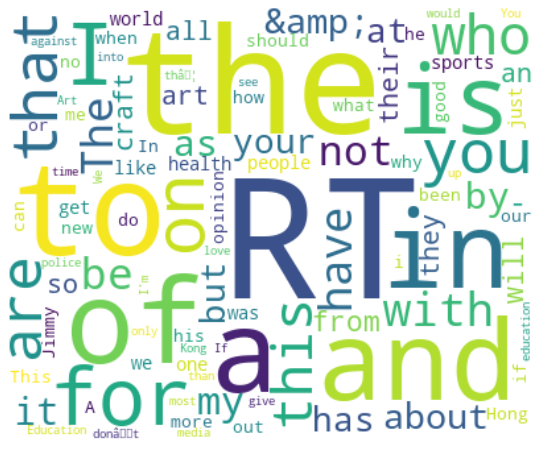

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Topic Modeling

In [29]:
## Topic Modelling 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def generate_topic_models(text):
    cvectorizer = CountVectorizer(min_df=4, max_features=2000)
    cvz = cvectorizer.fit_transform(text)

    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
    X_topics = lda_model.fit_transform(cvz)

    topic_word = lda_model.components_ 
    vocab = cvectorizer.get_feature_names()
    return topic_word, vocab 

n_top_words = 10
topic_word, vocab = generate_topic_models(tweets["cleaned"].values)
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print ("Topic " + str(i+1) + ": " + " | ".join(topic_words) + "\n")

Topic 1: rt | opinion | get | donâ | see | national | free | thatâ | unpopular | around

Topic 2: rt | us | last | since | long | years | great | always | big | aâ

Topic 3: rt | art | day | police | covid19 | amp | first | someone | public | back

Topic 4: craft | rt | prodemocracy | stop | narendramodi | wants | burning | former | fake | pressfreedom

Topic 5: would | itâ | said | rt | top | students | feedback | staffers | start | guys

Topic 6: rt | says | today | live | follow | court | supreme | nidhiindiatv | latest | ugcguidelines

Topic 7: rt | people | iâ | time | coronavirus | positive | mental | work | really | best

Topic 8: rt | news | education | thâ | life | give | take | answers | india | global

Topic 9: rt | amp | im | lai | new | hong | jimmy | media | want | kong

Topic 10: rt | health | world | sports | like | one | art | good | un | people

